<a href="https://colab.research.google.com/github/MAboElFottouh/DeepLearning-/blob/main/Session3CV__ed2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import Liberaries


In [2]:
import numpy as np
import pandas as pd
import os 
import random 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Read Images

In [3]:
#path
training_path_dogs='drive/My Drive/AmitAI6/dataset/training_set/dogs/'
training_path_cats='drive/My Drive/AmitAI6/dataset/training_set/cats/'

In [4]:
print(os.listdir(training_path_dogs))

['dog.3819.jpg', 'dog.3481.jpg', 'dog.375.jpg', 'dog.3333.jpg', 'dog.3353.jpg', 'dog.3726.jpg', 'dog.3561.jpg', 'dog.3588.jpg', 'dog.3344.jpg', 'dog.3568.jpg', 'dog.3500.jpg', 'dog.3703.jpg', 'dog.3599.jpg', 'dog.3387.jpg', 'dog.3304.jpg', 'dog.3302.jpg', 'dog.3601.jpg', 'dog.3723.jpg', 'dog.3424.jpg', 'dog.3823.jpg', 'dog.3266.jpg', 'dog.3413.jpg', 'dog.3504.jpg', 'dog.3684.jpg', 'dog.3471.jpg', 'dog.3687.jpg', 'dog.3574.jpg', 'dog.3448.jpg', 'dog.379.jpg', 'dog.3426.jpg', 'dog.3775.jpg', 'dog.3710.jpg', 'dog.3559.jpg', 'dog.3706.jpg', 'dog.3405.jpg', 'dog.3641.jpg', 'dog.3496.jpg', 'dog.3582.jpg', 'dog.3663.jpg', 'dog.3612.jpg', 'dog.3349.jpg', 'dog.3323.jpg', 'dog.3499.jpg', 'dog.3485.jpg', 'dog.3352.jpg', 'dog.3319.jpg', 'dog.3297.jpg', 'dog.3812.jpg', 'dog.3503.jpg', 'dog.3271.jpg', 'dog.3495.jpg', 'dog.3679.jpg', 'dog.3390.jpg', 'dog.3298.jpg', 'dog.3772.jpg', 'dog.3480.jpg', 'dog.3782.jpg', 'dog.3634.jpg', 'dog.3813.jpg', 'dog.3552.jpg', 'dog.3669.jpg', 'dog.353.jpg', 'dog.3635.

In [5]:
def load_images(path):

    imagesList=os.listdir(path)
    loaded_images=[]
    for image in imagesList:
        img=cv2.imread(path+image)
        loaded_images.append(img)

    return loaded_images


In [6]:
dog_images=load_images(training_path_dogs)
cat_images=load_images(training_path_cats)

In [7]:
print(len(dog_images))
print(len(cat_images))

4000
4000


Concatation 

In [78]:
training_images=[]
labels=[]
for i in range(len(dog_images)):
    training_images.append(dog_images[i])
    training_images.append(cat_images[i])
    labels.append(1)
    labels.append(0)

In [9]:
len(training_images)

8000

# Visualize Images

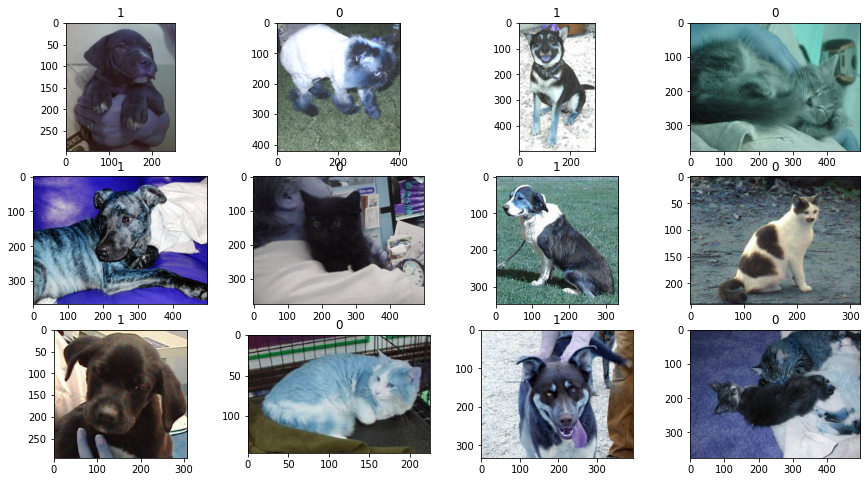

In [10]:
plt.figure(figsize=(15,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(training_images[i])
    plt.title(labels[i])
plt.show()

# Data Augmentation 


8000

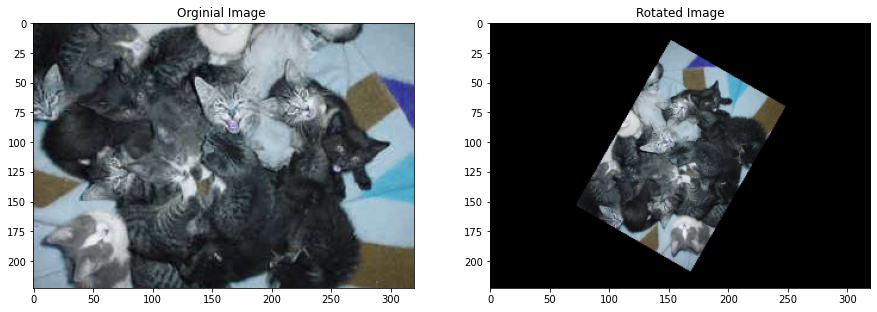

In [64]:
#Rotation 
import random
def rotation(image):
    height,width=image.shape[:2]
    angle=random.choice([45,90,30,60,])
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),angle,0.5)
    rotation_image=cv2.warpAffine(image,rotation_matrix,(width,height))

    return rotation_image


image=training_images[random.randint(0,7000)]
rotated_image=rotation(image)

fig,axs=plt.subplots(1,2,figsize=(15,10))

axs[0].imshow(image)
axs[0].set_title('Orginial Image ')

axs[1].imshow(rotated_image)
axs[1].set_title("Rotated Image")


Text(0.5, 1.0, 'translated Image')

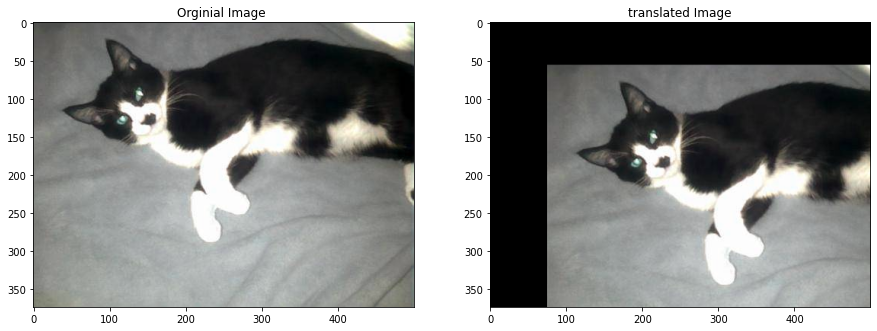

In [12]:
#translation 
def translation(image):
    height,width=image.shape[:2]
    r_num=random.choice([0.1,0.15,0.2])
    q_height,q_width=height*r_num,width*r_num

    T=np.float32([[1,0,q_width],[0,1,q_height]])
    img_translation=cv2.warpAffine(image,T,(width,height))

    return img_translation



image=training_images[random.randint(0,7000)]
translated_image=translation(image)

fig,axs=plt.subplots(1,2,figsize=(15,10))

axs[0].imshow(image)
axs[0].set_title('Orginial Image ')

axs[1].imshow(translated_image)
axs[1].set_title("translated Image")


Text(0.5, 1.0, 'vertical flip Image')

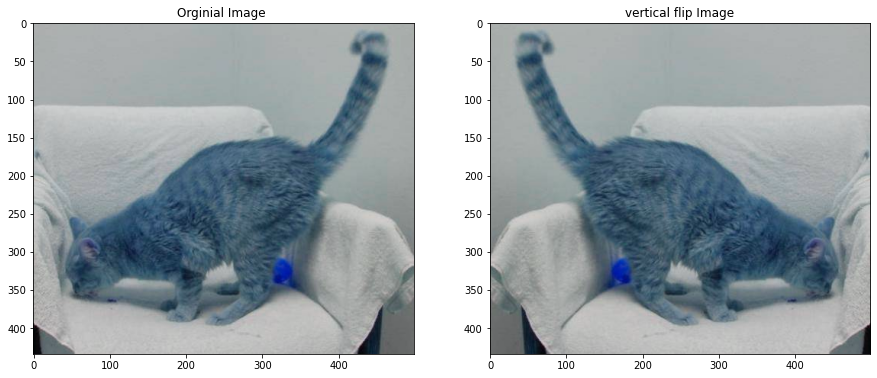

In [13]:
# vertical_flip 

def vertical_flip(image):
    flibbed_image=cv2.flip(image,1)
    return flibbed_image




image=training_images[random.randint(0,7000)]
flip_image=vertical_flip(image)

fig,axs=plt.subplots(1,2,figsize=(15,10))

axs[0].imshow(image)
axs[0].set_title('Orginial Image ')

axs[1].imshow(flip_image)
axs[1].set_title("vertical flip Image")

Text(0.5, 1.0, 'Horizontal flip Image')

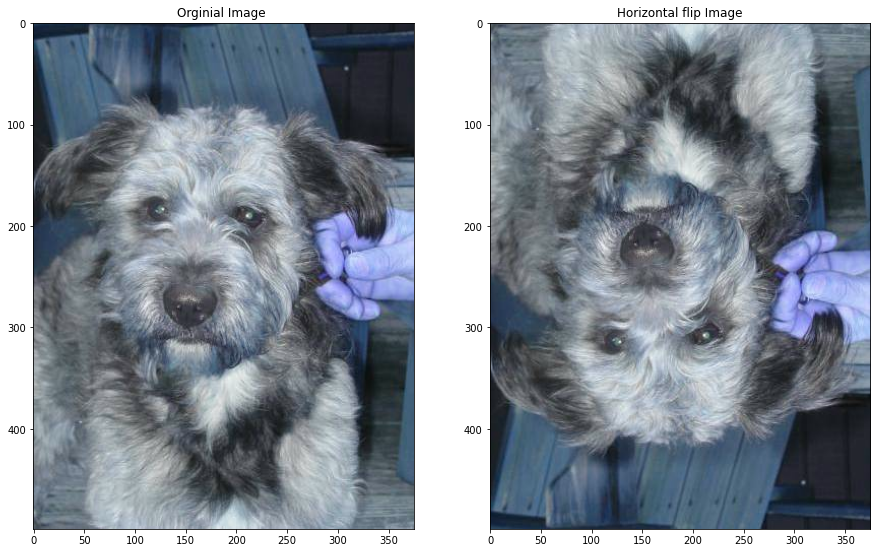

In [14]:
#Horizaontal Flip 

def horizontal_flip(image):
    flibbed_image=cv2.flip(image,0)
    return flibbed_image




image=training_images[random.randint(0,7000)]
flip_image=horizontal_flip(image)

fig,axs=plt.subplots(1,2,figsize=(15,10))

axs[0].imshow(image)
axs[0].set_title('Orginial Image ')

axs[1].imshow(flip_image)
axs[1].set_title("Horizontal flip Image")

In [67]:
dim1=[]
dim2=[]
for image in training_images:
    d1,d2,channel=image.shape
    dim1.append(d1)
    dim2.append(d2)
maxh = max(dim1)
maxw = max(dim2)
print('max h =  {} , min h = {} , mix w = {} , min w = {}'.format(max(dim1),min(dim1),max(dim2),min(dim2)))
print('avg h =  {} ,avg w =  {} '.format(np.mean(dim1) ,np.mean(dim2) ))

max h =  768 , min h = 41 , mix w = 1050 , min w = 57
avg h =  360.472 ,avg w =  403.801 


In [115]:



def padding(image):


  h = maxh
  w = maxw
  hh , ww , cc = image.shape
  color = (0,0,0)

  x_center = int((w - ww) / 2)
  y_center = int((h - hh) / 2)

  img_pad = cv2.copyMakeBorder(image, y_center, y_center, x_center, x_center, cv2.BORDER_CONSTANT, (0,0,0))

  return img_pad


In [100]:
# Augmented Image 

def augment_image(image):
    if np.random.rand()<0.5:
        image=rotation(image)
    if np.random.rand()<0.5:
        image=translation(image)
    if np.random.rand()<0.5:
        image=vertical_flip(image)
    if np.random.rand()<0.5:
        image=horizontal_flip(image)
    image=padding(image)

    return image 

max h =  768 , min h = 41 , mix w = 1050 , min w = 57
avg h =  360.472 ,avg w =  403.801 


(768, 1050, 3)
(767, 1050, 3)
(767, 1049, 3)
(768, 1049, 3)
(768, 1049, 3)
(768, 1049, 3)
(768, 1050, 3)
(767, 1050, 3)
(768, 1050, 3)
(767, 1050, 3)


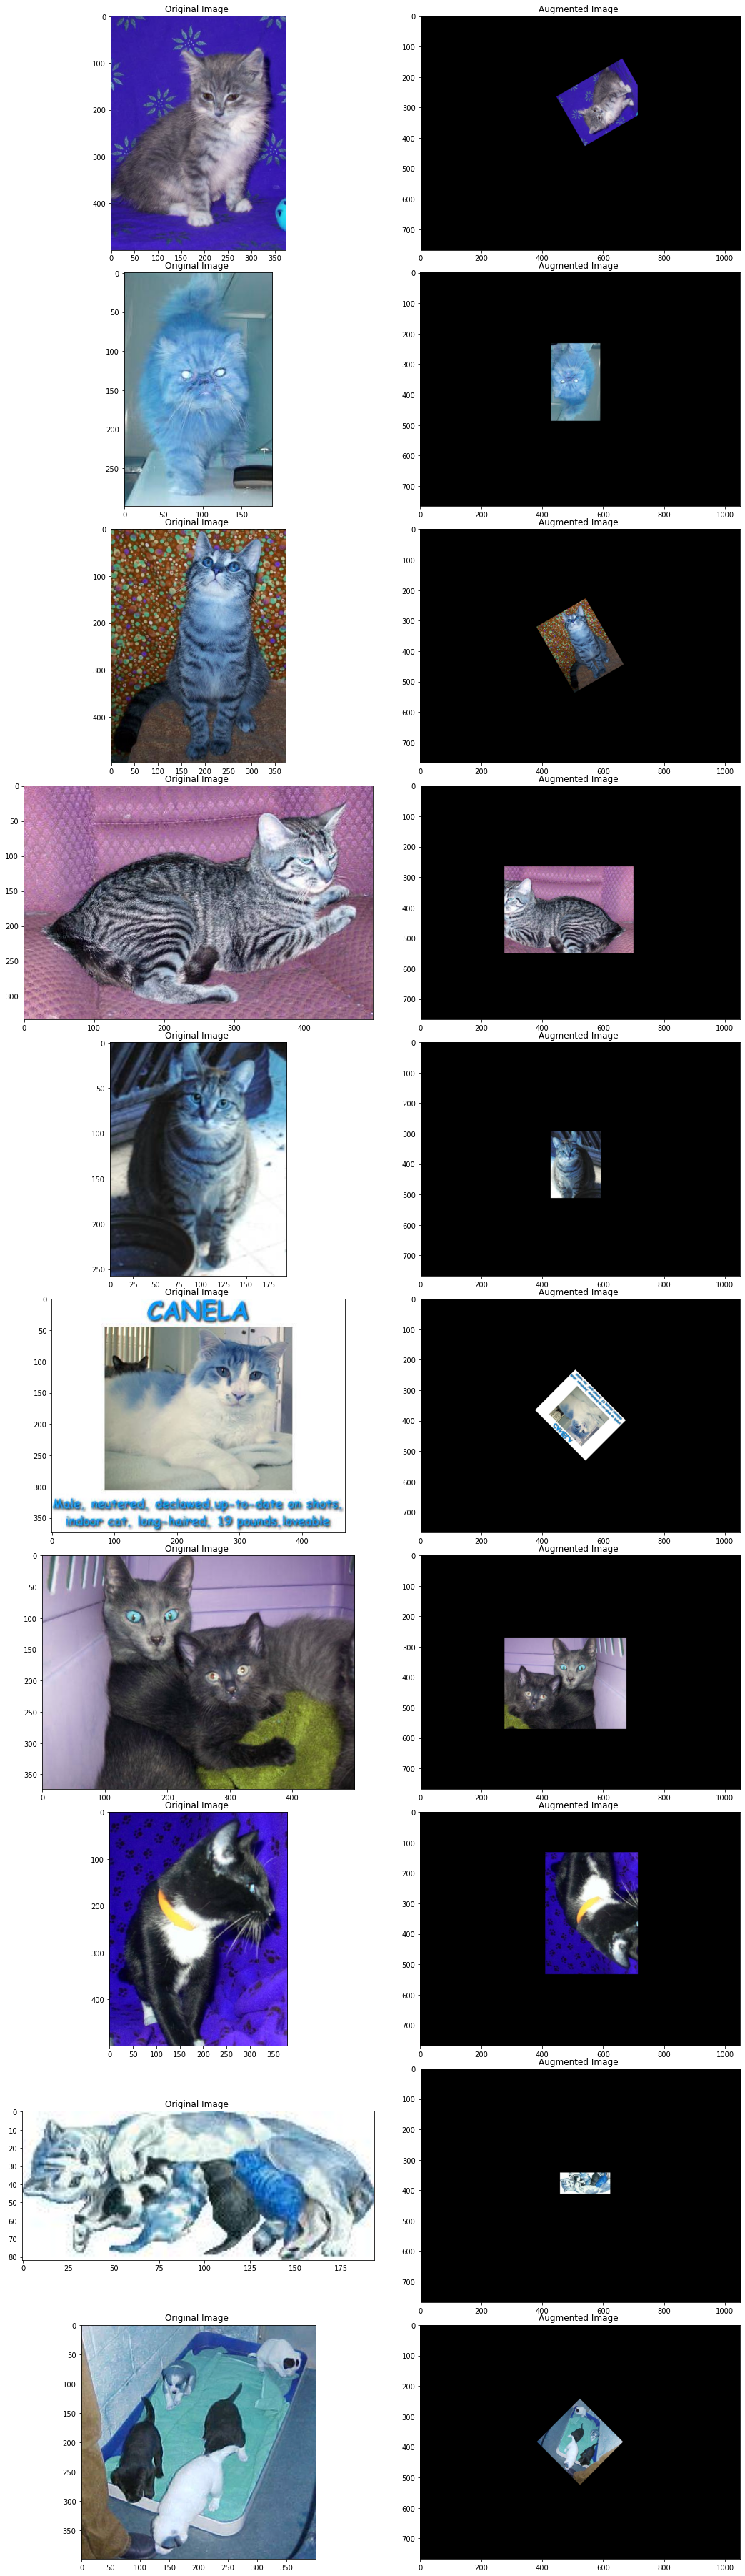

In [116]:
# Visualization  augmented image 

fig,axs=plt.subplots(10,2,figsize=(15,50))
fig.tight_layout()

for i in range(10):
    rand_num=random.randint(0,len(training_images)-1)
    image=training_images[rand_num]

    augmented_image=augment_image(image)

    axs[i][0].imshow(image)
    axs[i][0].set_title("Original Image ")

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image ")
    print(augmented_image.shape)

# Preprocessing

160

max h =  768 , min h = 41 , mix w = 1050 , min w = 57
avg h =  360.472 ,avg w =  403.801 


In [60]:
def image_preprocessing(image):
    image=np.array(image).astype('float32')
    image=cv2.resize(image,(360,400))
    return image

In [61]:
def batch_generator(images,labels,batch_size,istraining):
    while True :
        batch_img=[]
        batch_label=[]

        for i in range(batch_size):
            randIndex=random.randint(0,len(images)-1)

            image=augmented_image(images[randIndex])
            label=labels[randIndex]